In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
sns.set()

In [5]:
df = pd.read_pickle('../Data/Data_final.pickle')

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [6]:
df.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
IdMovie,,,,,,,,,,,,,,,,,,,,,
2,None,0.0,"[Drama, Crime]",fi,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,...,"[suomi, Deutsch]",Released,NaN,Ariel,7.1,44.0,1988,0.000000,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki]
3,None,0.0,"[Drama, Comedy]",fi,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,...,"[English, suomi, svenska]",Released,NaN,Shadows in Paradise,7.1,35.0,1986,0.000000,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki]
5,None,4000000.0,"[Crime, Comedy]",en,It's Ted the Bellhop's first night on the job....,9.026586,"[Miramax Films, A Band Apart]",[United States of America],1995-12-09,4300000.0,...,[English],Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,539.0,1995,1.075000,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
6,None,0.0,"[Action, Thriller, Crime]",en,"While racing to a boxing match, Frank, Mike, J...",5.538671,"[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",1993-10-15,12136938.0,...,[English],Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.4,79.0,1993,0.000000,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]
11,Star Wars Collection,11000000.0,"[Adventure, Action, Science Fiction]",en,Princess Leia is captured and held hostage by ...,42.149697,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,775398007.0,...,[English],Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6778.0,1977,70.490728,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas]


In [11]:
df.dtypes

belongs_to_collection            object
budget                          float64
genres                           object
original_language                object
overview                         object
popularity                      float64
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
release_year                      int64
return                          float64
cast                             object
crew                             object
dtype: object

<AxesSubplot: xlabel='budget', ylabel='popularity'>

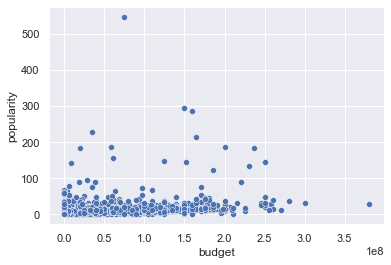

In [8]:
sns.scatterplot(data=df, x='budget', y='popularity')

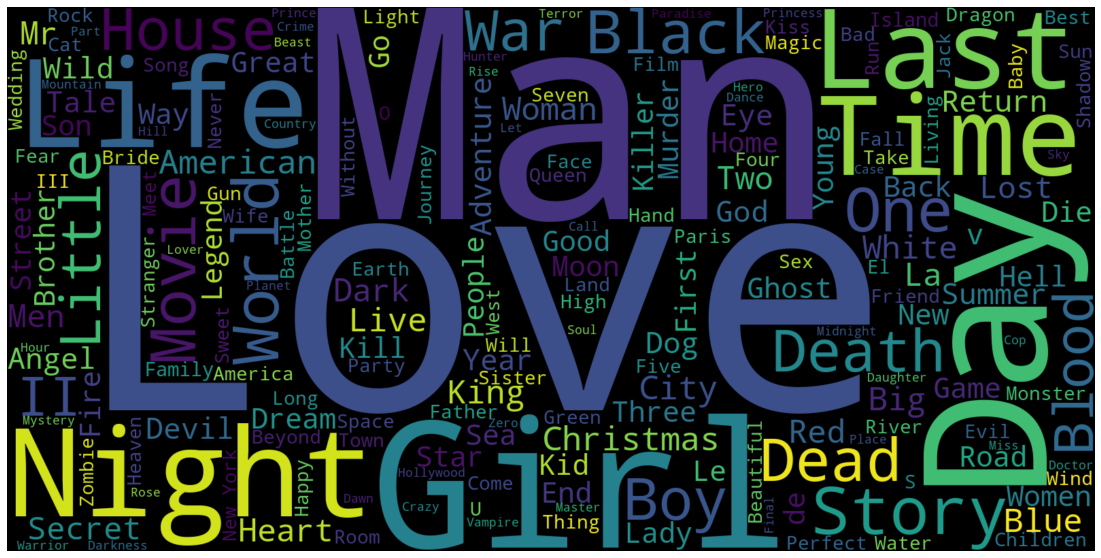

In [9]:
texto = " ".join(df['title'])

wordcloud = WordCloud(width=1600, height=800).generate(texto)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df_numerical = df[['budget','popularity','revenue','runtime','vote_average','vote_count','return']]
df_categorical = df[['title','director']]

In [10]:
df.head(2)

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
IdMovie,,,,,,,,,,,,,,,,,,,,,
2,None,0.0,"[Drama, Crime]",fi,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,...,"[suomi, Deutsch]",Released,NaN,Ariel,7.1,44.0,1988,0.0,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki]
3,None,0.0,"[Drama, Comedy]",fi,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,...,"[English, suomi, svenska]",Released,NaN,Shadows in Paradise,7.1,35.0,1986,0.0,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki]


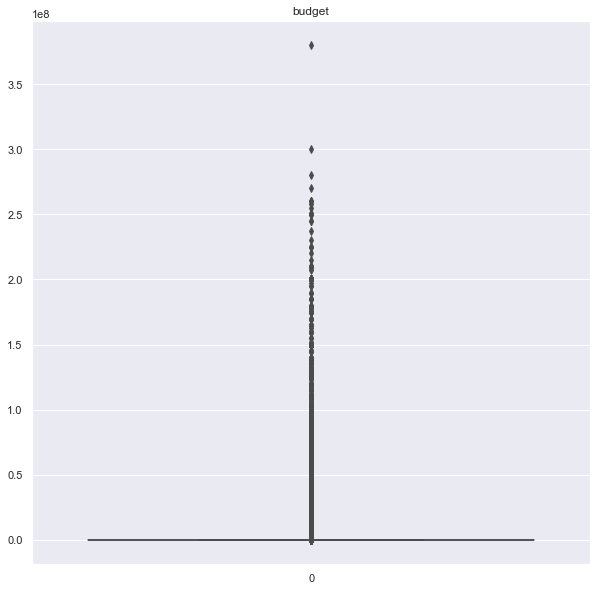

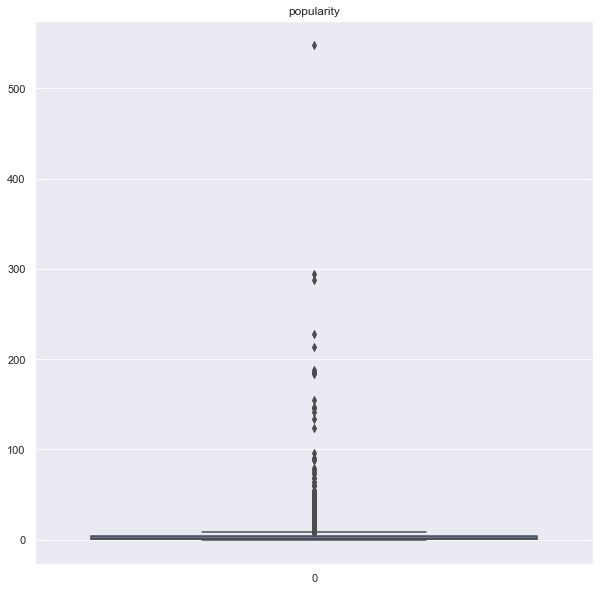

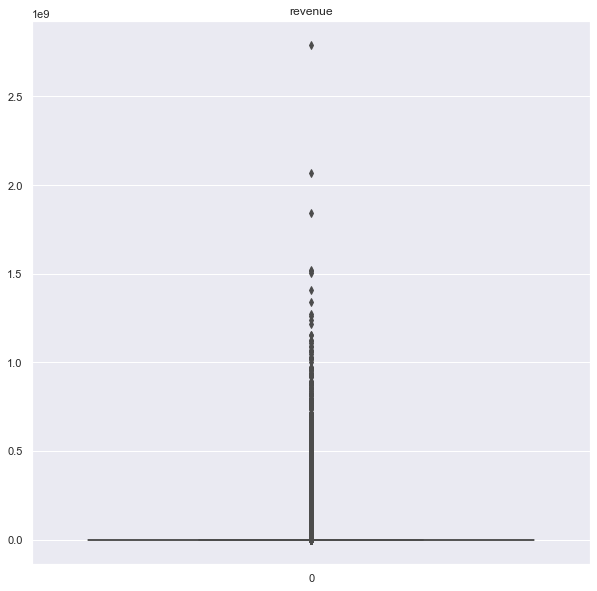

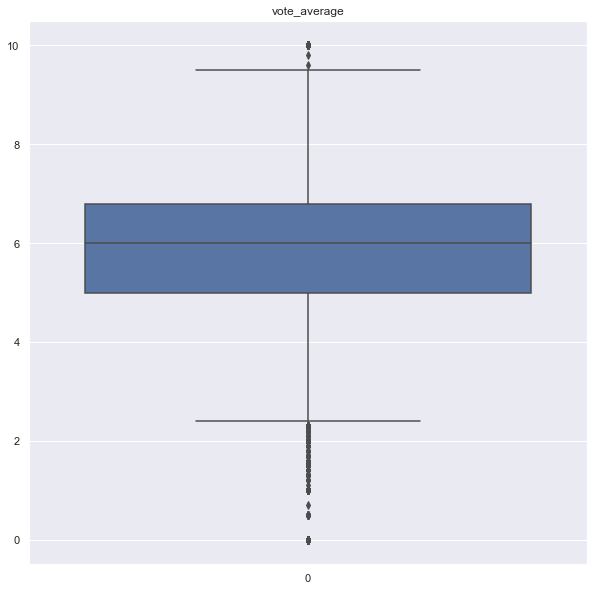

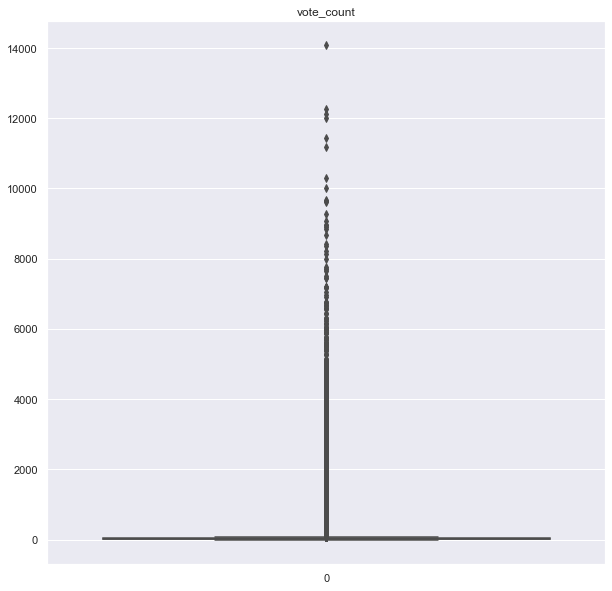

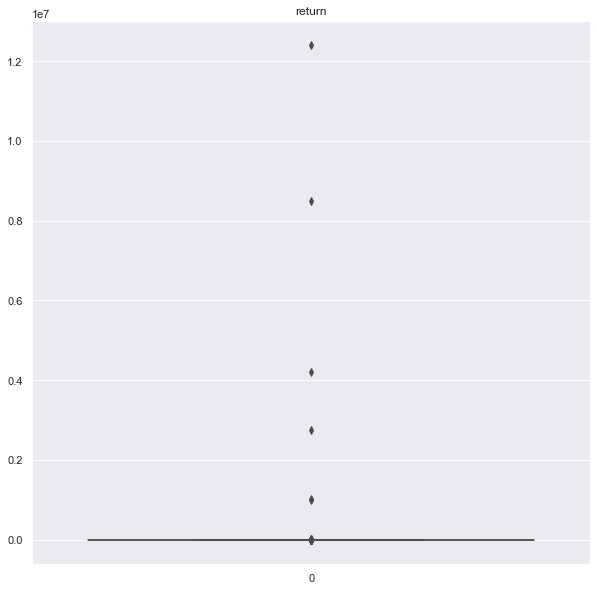

In [38]:
for a in df_numerical.columns:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=df[a])

    # Ajusta el tamaño de la figura
    
    plt.title(a)
    # Muestra el diagrama de caja
    plt.show()

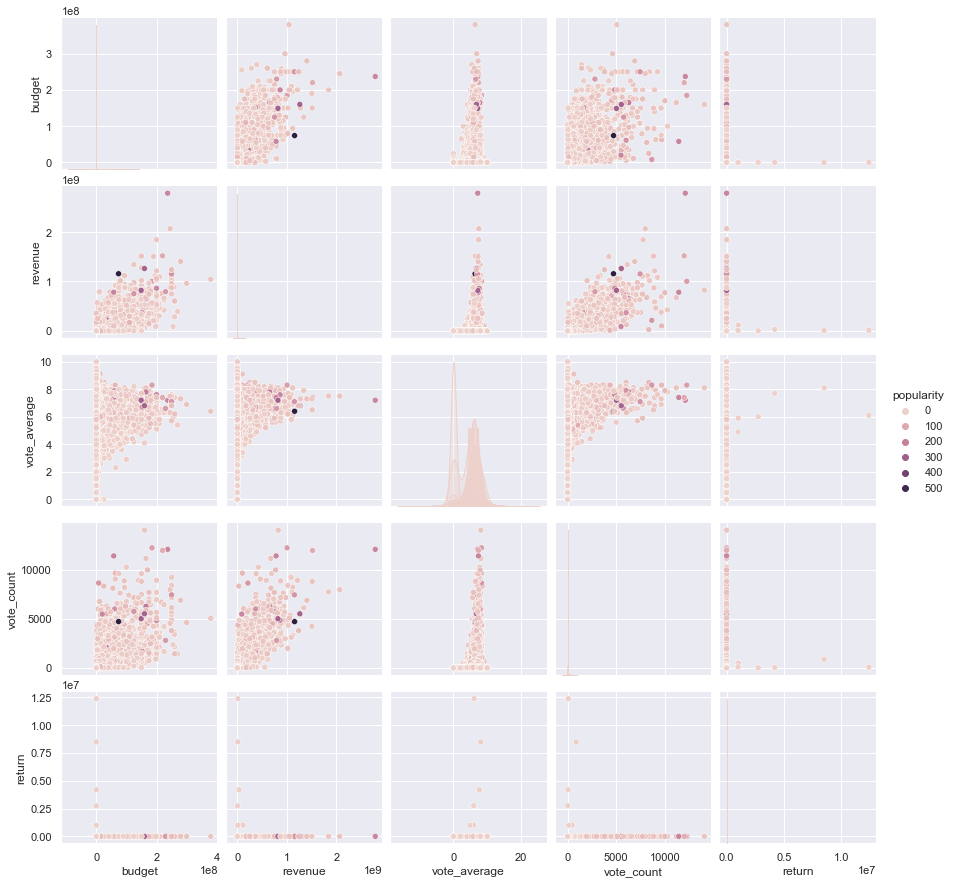

In [14]:
sns.pairplot(df_numerical, hue = "popularity")

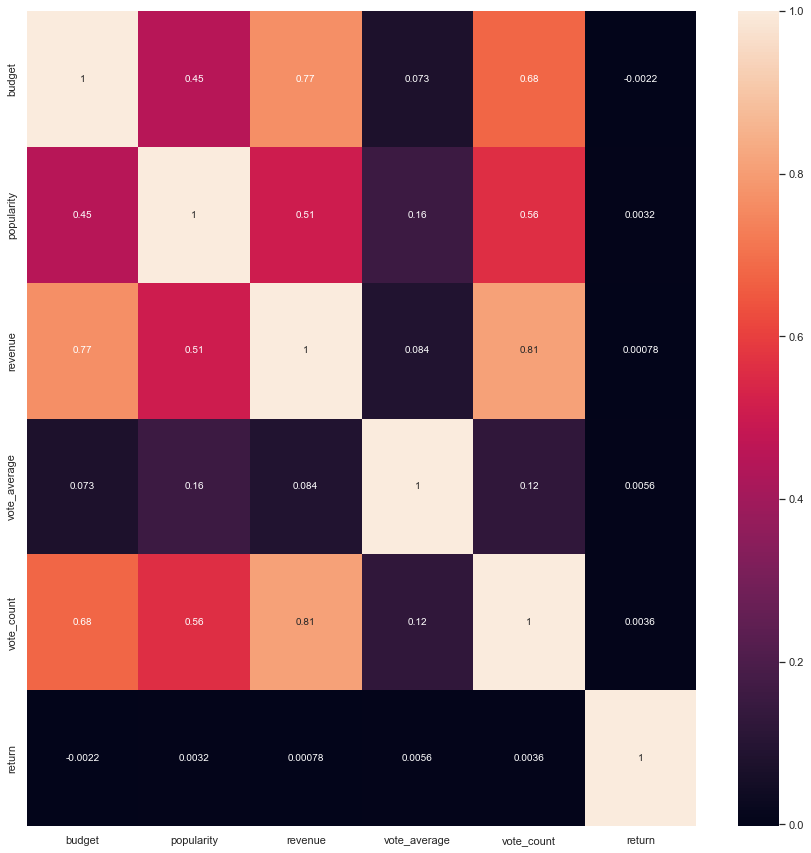

In [40]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df_numerical.corr(), annot = True)
plt.show()

In [ ]:
for categorical in df_categorical.columns:
    sns.barplot(x='columna_categorica', y='columna_numerica', data=df_categorical)

    # Muestra el gráfico de barras
    plt.show()